#**Taller #3**

#**Juan Jacobo González Herrera (1006228229)**

REFERENCIAS: 

https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html (Método Euler)

https://stackoverflow.com/questions/49807524/how-do-i-use-pylab-to-plot-a-phase-plane-for-pendulum-motion (Plano de fase)

https://stackoverflow.com/questions/58701195/plotting-phase-portraits-in-python-using-polar-coordinates (Plano de fase para coordenadas polares)

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import cosh
from sympy import sinh
import pandas as pd
from scipy import integrate
import ipywidgets as ipw
from pylab import *
from scipy.integrate import odeint
%matplotlib inline

In [2]:
#DEFINICIÓN METODO EULER
def Euler(func, X0, t):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    x,y=X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

#6.1 Phase Portraits

## For each of the following systems, find the fixed points. Then sketch the nullclines, the vector field, and a plausible phase portrait.

##6.1.2 $\;\;\dot{x}=x-x^3,\;\;\dot{y}=-y$

Puntos nulos dados por:
$$
N1=x=0\;\;(\dot{x}=0)
$$
$$
N2=x=1\;\;(\dot{x}=0)
$$
$$
N3=x=-1\;\;(\dot{x}=0)
$$
$$
N4=y=0\;\;(\dot{y}=0)
$$
Luego, los puntos fijos son:
$$
(-1,0),\;(0,0),\;(1,0).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
1-3x^2 & 0\\
0 & -1
\end{bmatrix}
$$
$$
J(0,0)=\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}=(0,0) \rightarrow \textrm{es un saddle-node}
$$
$$
J(-1,0)=\begin{bmatrix}
-2 & 0\\
0 & -1
\end{bmatrix}=(-1,0) \rightarrow \textrm{es un stable node}
$$
$$
J(1,0)=\begin{bmatrix}
-2 & 0\\
0 & -1
\end{bmatrix}=(1,0) \rightarrow \textrm{es un stable node}
$$

In [3]:
X0=[10, 10] #X y Y inicial
def derivative(X, t):
    x, y = X
    dotx = x-x**3
    doty = -y
    return np.array([dotx, doty])

In [4]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

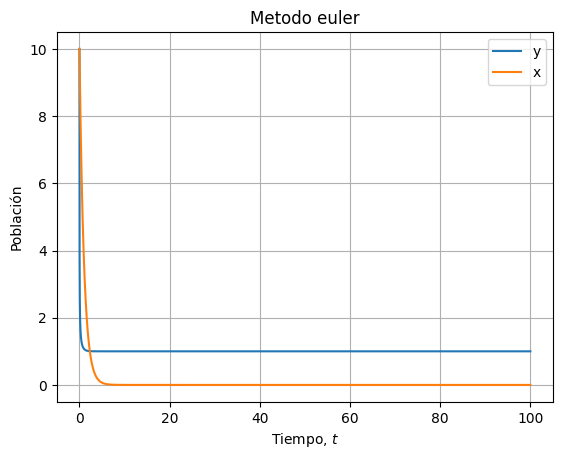

In [5]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

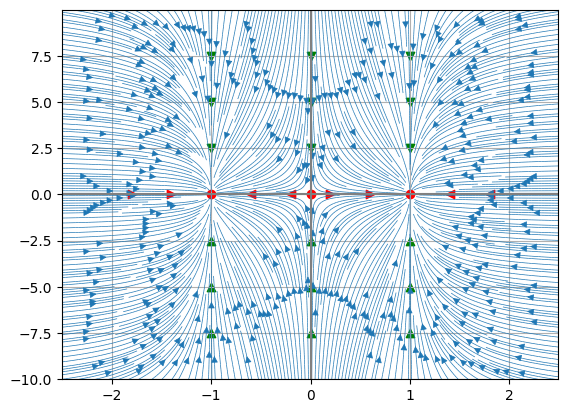

In [6]:
#Phase portrait

x, y = meshgrid(arange(-2.5, 2.5, 0.01), arange(-10, 10, 0.01))
xdot = x-x**3 
ydot = -y
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(0.2, 0,color='red', marker='>')
plt.scatter(0.6, 0,color='red', marker='>')
plt.scatter(1, 0,color='red', marker='o')
plt.scatter(1.4, 0,color='red', marker='<')
plt.scatter(1.8, 0,color='red', marker='<')

plt.scatter(-0.2, 0,color='red', marker='<')
plt.scatter(-0.6, 0,color='red', marker='<')
plt.scatter(-1, 0,color='red', marker='o')
plt.scatter(-1.4, 0,color='red', marker='>')
plt.scatter(-1.8, 0,color='red', marker='>')

plt.scatter(0, 0,color='red', marker='o')

plt.scatter(0, 2.5,color='green', marker='v')
plt.scatter(0, 5,color='green', marker='v')
plt.scatter(0, 7.5,color='green', marker='v')

plt.scatter(0, -2.5,color='green', marker='^')
plt.scatter(0, -5,color='green', marker='^')
plt.scatter(0, -7.5,color='green', marker='^')

plt.scatter(1, 2.5,color='green', marker='v')
plt.scatter(1, 5,color='green', marker='v')
plt.scatter(1, 7.5,color='green', marker='v')

plt.scatter(1, -2.5,color='green', marker='^')
plt.scatter(1, -5,color='green', marker='^')
plt.scatter(1, -7.5,color='green', marker='^')

plt.scatter(-1, 2.5,color='green', marker='v')
plt.scatter(-1, 5,color='green', marker='v')
plt.scatter(-1, 7.5,color='green', marker='v')

plt.scatter(-1, -2.5,color='green', marker='^')
plt.scatter(-1, -5,color='green', marker='^')
plt.scatter(-1, -7.5,color='green', marker='^')

grid(); show()

##6.1.4 $\;\;\dot{x}=y,\;\;\dot{y}=x(1+y)-1$

Puntos nulos dados por:
$$
N1=y=0\;\;(\dot{x}=0)
$$
$$
N2=y=\frac{1-x}{x}\;\;(\dot{y}=0)
$$

Luego, el único punto fijo es
$$
(1,0).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
0 & 1\\
1+y & x
\end{bmatrix}
$$
$$
J(1,0)=\begin{bmatrix}
0 & 1\\
1 & 1
\end{bmatrix}=(0,0)
$$
Luego los valores propios satisfacen:
$$
\lambda_1\lambda_2=-1
$$
$$
\lambda_1+\lambda_2=1
$$
$$
\lambda_1=\frac{1\pm \sqrt{1+4}}{2}
$$
Luego, $(1,0)$ es un saddle.

In [7]:
X0=[1, 0] #X y Y inicial, los dejé en el único punto fijo.
def derivative(X, t):
    x, y = X
    dotx = y
    doty = x*(1+y)-1
    return np.array([dotx, doty])

In [8]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

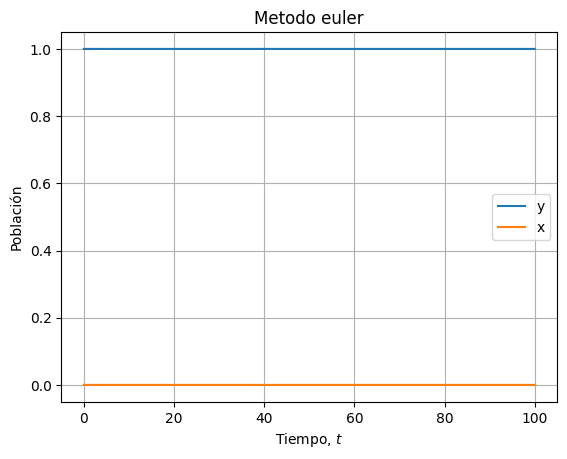

In [9]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

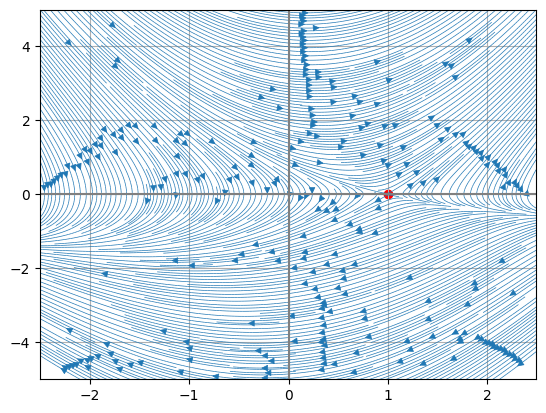

In [10]:
#Phase portrait

x, y = meshgrid(arange(-2.5, 2.5, 0.01), arange(-5, 5, 0.01))
xdot = y
ydot = x*(1+y)-1
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(1, 0,color='red', marker='o')

grid(); show()

##6.1.6 $\;\;\dot{x}=x^2-y,\;\;\dot{y}=x-y$

Puntos nulos dados por:
$$
N1=y=x^2\;\;(\dot{x}=0)
$$
$$
N2=x=y\;\;(\dot{y}=0)
$$

Luego, los puntos fijos son:
$$
(0,0),\;\;(1,1).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
2x & -1\\
1 & -1
\end{bmatrix}
$$
$$
J(0,0)=\begin{bmatrix}
0 & -1\\
1 & -1
\end{bmatrix}\rightarrow \Delta =1, \tau=-1 \;\;\textrm{(Stable node)}
$$
$$
J(1,1)=\begin{bmatrix}
2 & -1\\
1 & -1
\end{bmatrix}\rightarrow \Delta =-1, \tau=1\;\;\textrm{(Saddle node)}
$$



In [11]:
X0=[0, 0] #X y Y inicial, lo dejé en un punto fijo
def derivative(X, t):
    x, y = X
    dotx = x**2-y
    doty = x-y
    return np.array([dotx, doty])

In [12]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

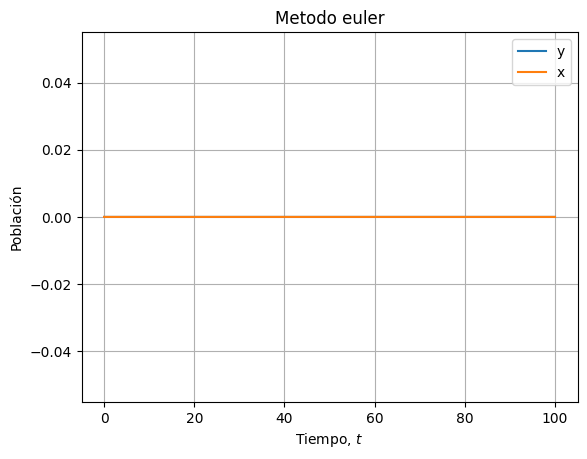

In [13]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

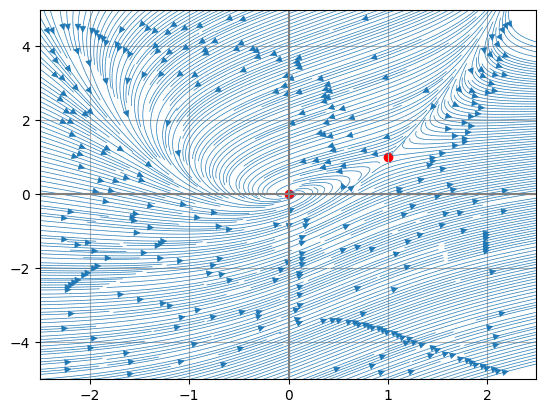

In [14]:
#Phase portrait

x, y = meshgrid(arange(-2.5, 2.5, 0.01), arange(-5, 5, 0.01))
xdot = x**2-y
ydot = x-y
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(0, 0,color='red', marker='o')
plt.scatter(1, 1,color='red', marker='o')

grid(); show()

#6.3 Fixed Points and Linearization


##For each of the following systems, find the fixed points, classify them, sketch the neighboring trajectories, and try to fill in the rest of the phase portrait.

##6.3.2 $\;\;\dot{x}=\sin{y},\;\;\dot{y}=x-x^3$

Puntos nulos dados por:
$$
N1=\sin{(y)}=0\;\rightarrow y=\pi n\;\;(\dot{x}=0)
$$
$$
N2=x=0\;\;(\dot{y}=0)
$$
$$
N3=x=\pm 1\;\;(\dot{y}=0)
$$

Luego, los puntos fijos son:
$$
(0,\pi n),\;(\pm 1, \pi n).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
0 & \cos{(y)}\\
1-3x^2 & 0
\end{bmatrix}
$$
$$
J(0,\pi n)=\begin{bmatrix}
0 & (-1)^n\\
1 & 0
\end{bmatrix}\rightarrow \lambda_1\lambda_2=(-1)^{n+1}\;\; \textrm{   y   }\;\; \lambda_1+\lambda_2=0 \rightarrow \lambda_{1,2}=\pm \sqrt{(-1)^n}
$$
$$
J(\pm 1,\pi n)=\begin{bmatrix}
0 & (-1)^n\\
-1 & 0
\end{bmatrix}\rightarrow \lambda_{1,2}=\pm \sqrt{(-1)^{n+1}}
$$
Cuando $\lambda_{1,2}$ tiene valor imaginario, se analiza de la siguiente forma:
$$
\frac{dy}{dx}=\frac{x-x^3}{\sin{(y)}}\rightarrow \frac{x^2}{2}-\frac{x^4}{4}+\cos{(y)}=C
$$
Luego, las curvas de la solución son contornos de $F(x,y)=\frac{x^2}{2}-\frac{x^4}{4}+\cos{(y)}$

In [15]:
X0=[1, 1] #X y Y inicial
def derivative(X, t):
    x, y = X
    dotx = np.sin(y)
    doty = x-x**3
    return np.array([dotx, doty])

In [16]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

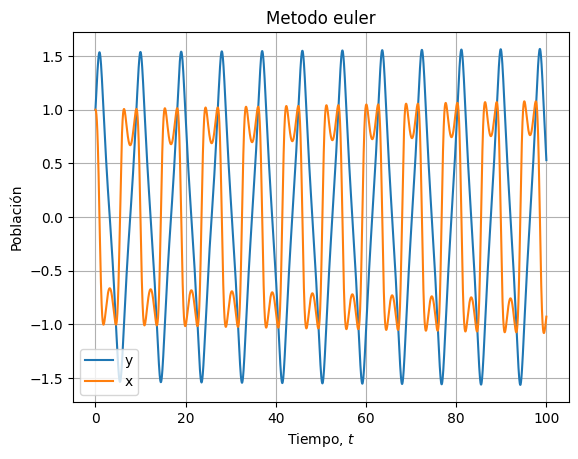

In [17]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

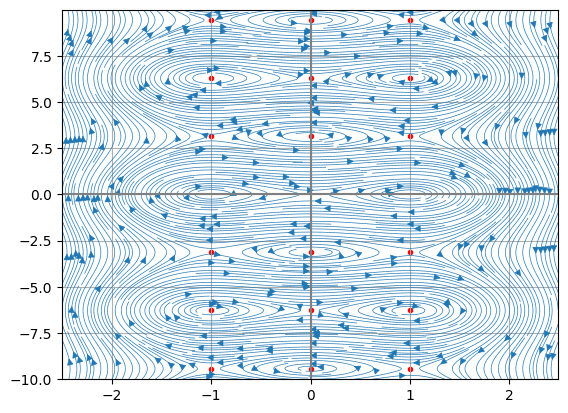

In [18]:
#Phase portrait

x, y = meshgrid(arange(-2.5, 2.5, 0.01), arange(-10, 10, 0.01))
xdot = np.sin(y)
ydot = x-x**3
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(0, 3.14,color='red', marker='.')
plt.scatter(0, 2*3.14,color='red', marker='.')
plt.scatter(0, 3*3.14,color='red', marker='.')

plt.scatter(1, 3.14,color='red', marker='.')
plt.scatter(1, 2*3.14,color='red', marker='.')
plt.scatter(1, 3*3.14,color='red', marker='.')


plt.scatter(-1, 3.14,color='red', marker='.')
plt.scatter(-1, 2*3.14,color='red', marker='.')
plt.scatter(-1, 3*3.14,color='red', marker='.')

plt.scatter(0, -3.14,color='red', marker='.')
plt.scatter(0, -2*3.14,color='red', marker='.')
plt.scatter(0, -3*3.14,color='red', marker='.')

plt.scatter(1, -3.14,color='red', marker='.')
plt.scatter(1, -2*3.14,color='red', marker='.')
plt.scatter(1, -3*3.14,color='red', marker='.')


plt.scatter(-1, -3.14,color='red', marker='.')
plt.scatter(-1, -2*3.14,color='red', marker='.')
plt.scatter(-1, -3*3.14,color='red', marker='.')

grid(); show()

##6.3.6 $\;\;\dot{x}=xy-1,\;\;\dot{y}=x-y^3$

Puntos nulos dados por:
$$
N1=y=1/x\;\;(\dot{x}=0)
$$
$$
N2=y=x^{1/3}\;\;(\dot{y}=0)
$$

Luego, los puntos fijos son:
$$
(-1,-1),\;(1,1).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
y & x\\
1 & -3y^2
\end{bmatrix}
$$
$$
J(-1,-1)=\begin{bmatrix}
-1 & -1\\
1 & -3
\end{bmatrix}\rightarrow \lambda_1\lambda_2=4,\;\;\lambda_1+\lambda_2=-4\rightarrow \lambda_{1,2}=-2\;\; \textrm{(Stable node)}
$$
$$
J(1,1)=\begin{bmatrix}
1 & 1\\
1 & -3
\end{bmatrix}\rightarrow \lambda_1\lambda_2=-4,\;\;\lambda_1+\lambda_2=-2\rightarrow \lambda_1=\frac{-2\pm \sqrt{4+16}}{2}\;\; \textrm{(Saddle-node)}
$$


In [19]:
X0=[0, 0] #X y Y inicial
def derivative(X, t):
    x, y = X
    dotx = x*y-1
    doty = x-y**3
    return np.array([dotx, doty])

In [20]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

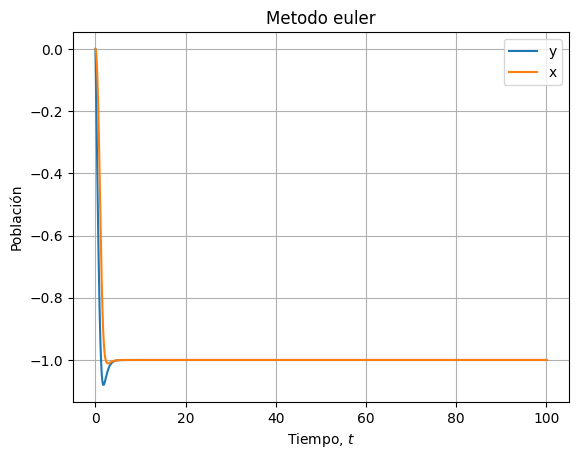

In [21]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

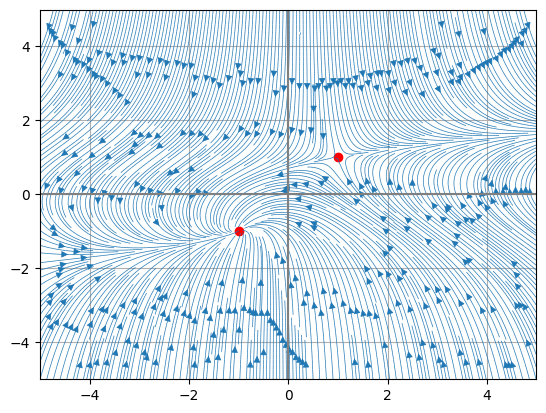

In [22]:
#Phase portrait

x, y = meshgrid(arange(-5, 5, 0.01), arange(-5, 5, 0.01))
xdot = x*y-1
ydot = x-y**3
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(-1, -1,color='red', marker='o')
plt.scatter(1, 1,color='red', marker='o')

grid(); show()

##6.3.12 (Polar coordinates) Using the identity $\theta=tan^{-1}(y/x)$, show that $\dot{\theta}=(x\dot{y}-y\dot{x})/r^2$.

Tomando en cuenta que
$$
x^2+y^2=r^2
$$
$$
x=r\cos{\theta}
$$
$$
y=r\sin{\theta}
$$
$$
\tan{\theta}=y/x
$$
Hallando la derivada:
$$
\frac{d}{dx}\tan^{-1}{(x)}=\frac{1}{1+x^2}
$$
De forma similar:
$$
\frac{d}{dx}\tan^{-1}{(y/x)}=\frac{1}{1+\frac{y}{x}^2}\frac{x\dot{y}-y\dot{x}}{x^2}
$$
$$
\dot{\theta}=\frac{x^2}{x^2+y^2}\frac{x\dot{y}-y\dot{x}}{x^2}
$$
$$
\dot{\theta}=\frac{x\dot{y}-y\dot{x}}{x^2+y^2}
$$
Luego:
$$
\dot{\theta}=\frac{x\dot{y}-y\dot{x}}{r^2}
$$

In [23]:
X0=[1, 1] #X y Y inicial
R, Theta = (1**2 + 1**2)**0.5, np.arctan2(1, 1)
def derivative(X, t):
    x, y = X
    dotx = -R**3 #a = -1 (menor a 0) (r)
    doty = 1+0*Theta #(theta)
    return np.array([dotx, doty])

In [24]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

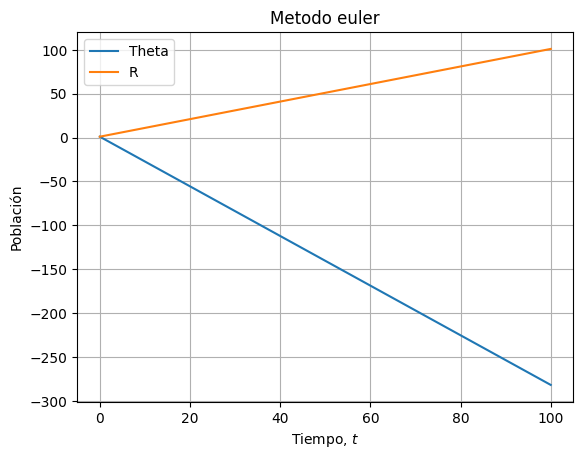

In [25]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'Theta')
plt.plot(t, Xe[:, 1], label = "R")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

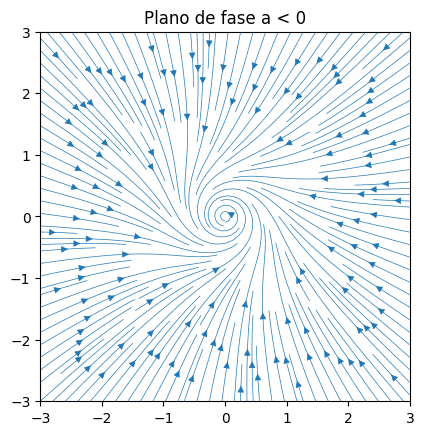

In [26]:
#Phase portrait a < 0

def dF(r, theta):
    return -r**3, 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, linewidth=0.5, density=2)
plt.title('Plano de fase a < 0')
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

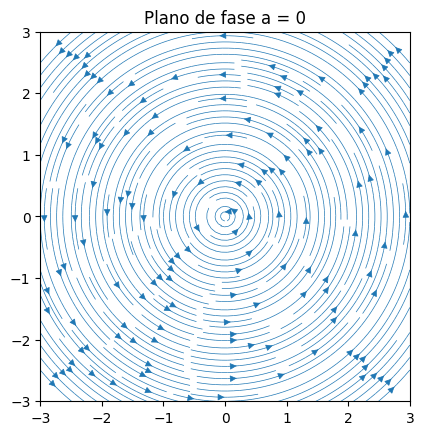

In [27]:
#Phase portrait a = 0

def dF(r, theta):
    return 0, 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, linewidth=0.5, density=2)
plt.title('Plano de fase a = 0')
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

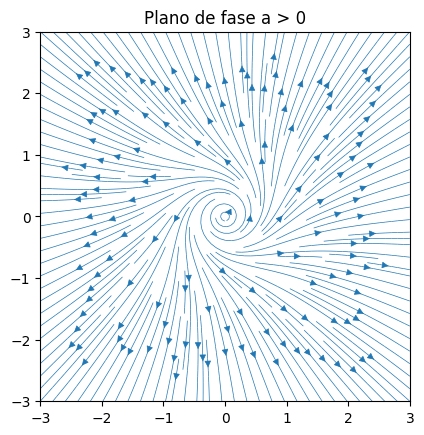

In [28]:
#Phase portrait a > 0

def dF(r, theta):
    return r**3, 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, linewidth=0.5, density=2)
plt.title('Plano de fase a > 0')
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

#6.4 Rabbits versus Sheep

## Consider the following “rabbits vs. sheep” problems, where $x, y > 0$. Find the fixed points, investigate their stability, draw the nullclines, and sketch plausible phase portraits. Indicate the basins of attraction of any stable fixed points

##6.4.2 $\;\;\dot{x}=x(3-2x-y),\;\;\dot{y}=y(2-x-y)$

Los puntos fijos son:
$$
(0,0),\;(3/2,0),\;(0,2),\;(1,1).
$$
Calculando el Jacobiano:
$$
J(x,y)=\begin{bmatrix}
3-4x-y & -x\\
-y & 2-x-2y
\end{bmatrix}
$$
$$
J(0,0)=\begin{bmatrix}
3 & 0\\
0 & 2
\end{bmatrix}\rightarrow \lambda_{1,2}=(3,2)\;\;\textrm{Luego como ambos son positivos, es un nodo inestable.}
$$
$$
J(0,2)=\begin{bmatrix}
1 & 0\\
-2 & -2
\end{bmatrix}\rightarrow \lambda_{1,2}=(1,-2)\;\;\textrm{Luego como uno es positivo y otro negativo, se tiene un saddle-point inestable}
$$
$$
J(3/2,0)=\begin{bmatrix}
3 & -3/2\\
0 & 1/2
\end{bmatrix}\rightarrow \lambda_{1,2}=(-3,1/2)\;\;\textrm{Luego se tiene un saddle-point inestable}
$$
$$
J(1,1)=\begin{bmatrix}
-2 & -1\\
-1 & -1
\end{bmatrix}\rightarrow \lambda=(-3/2\pm \sqrt{3}/2i)\;\;\textrm{Luego se tiene un espiral estable}
$$

Para valores mayores a 0, el sistema tenderá al equilibrio (1,1):

In [29]:
X0=[2,5] #X y Y inicial
def derivative(X, t):
    x, y = X
    dotx = x*(3-2*x-y)
    doty = y*(2-x-y)
    return np.array([dotx, doty])

In [30]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

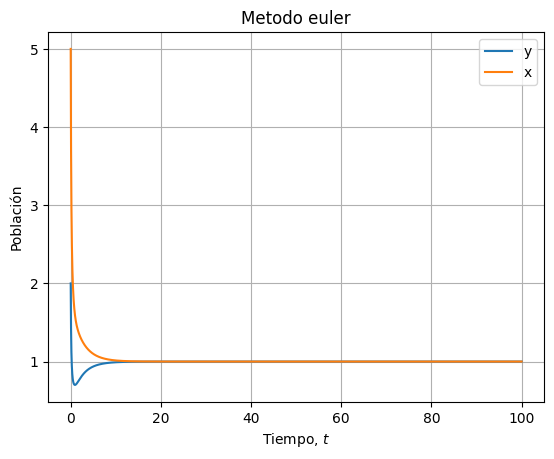

In [31]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show() #Como se puede observar, tienden a equilibrio si son positivos

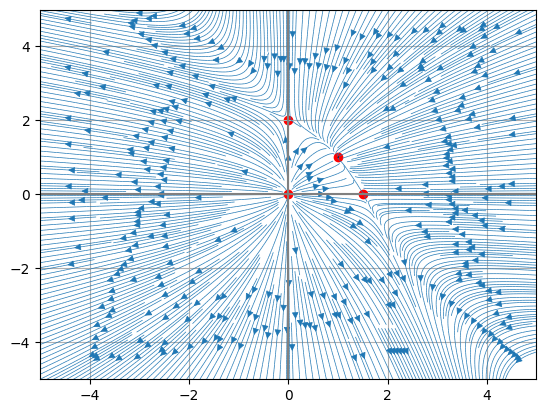

In [32]:
#Phase portrait

x, y = meshgrid(arange(-5, 5, 0.01), arange(-5, 5, 0.01))
xdot = x*(3-2*x-y)
ydot = y*(2-x-y)
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(0, 0,color='red', marker='o')
plt.scatter(1, 1,color='red', marker='o')
plt.scatter(3/2, 0,color='red', marker='o')
plt.scatter(0, 2,color='red', marker='o')


grid(); show()

## The next three exercises deal with competition models of increasing complexity. We assume $N_1, N_2 \geq 0$ in all cases.

##6.4.6 Finally, suppose that both species have finite carrying capacities:
##$$
\dot{N}_1=r_1N_1(1-N_1/K_1)-b_1N_1N_2
$$
##$$
\dot{N}_2=r_2N_2(1-N_2/K_2)-b_2N_1N_2
$$
##a) Nondimensionalize the model. How many dimensionless groups are needed?
##b) Show that there are four qualitatively different phase portraits, as far as longterm behavior is concerned.
##c) Find conditions under which the two species can stably coexist. Explain the biological meaning of these conditions. (Hint: The carrying capacities reflect the competition *within* a species, whereas the b’s reflect the competition *between* species.)

a) Para comenzar, se asume que:
$$
u_1=\frac{N_1}{K_1}
$$

$$
u_2=\frac{N_2}{K_2}
$$

$$
b_{1,2}=\frac{b_1K_2}{\mu_1}
$$

$$
b_{2,1}=\frac{b_2K_1}{\mu_2}
$$

El tiempo adimensional será $\tau=\mu_1t$, donde $\mu=\frac{\mu_2}{\mu_1}$, luego el sistema se reduce a:

$$
\mu_1K_1\frac{du_1}{d\tau}=\mu_1u_1K_1\left(1-\frac{\mu_1K_1}{K_1}\right)-\frac{b_{1,2}\mu_1}{k2}u_1u_2K_1K_2
$$

$$
\mu_1K_1\frac{du_1}{d\tau}=\mu_1K_1\left[u_1(1-u_1)-b_{1,2}u_1u_2\right]
$$

$$
\frac{du_1}{d\tau}=u_1(1-u_1-b_{1,2}u_2)
$$

y, de la misma forma:

$$
\frac{du_2}{d\tau}=\mu \left[u_2(1-u_2-b_{2,1}u_1)\right]
$$

Adimensionalizando $\dot{\mu}$, se necesitaron 2 grupos.

b) Primero se halla el estado estacionario:

$$
\frac{du_1}{d\tau}=0\;\;\;y\;\;\;\frac{du_2}{d\tau}=0
$$

$$
u_1(1-u_1-b_{1,2}u_2)=0
$$

$$
u_1=\frac{1-b_{1,2}}{1-b_{1,2}b_{2,1}}
$$

De la misma forma:

$$
\mu \left[u_2(1-u_2-b_{2,1}u_1)\right]=0
$$

$$
u_2=\frac{1-b_{2,1}}{1-b_{1,2}b_{2,1}}
$$

Al hallar los otros puntos fijos de equilibrio se obtiene:

$$
(0,0),\;(1,0),\;(0,1),\;\left(\frac{1-b_{1,2}}{1-b_{1,2}b_{2,1}},\frac{1-b_{2,1}}{1-b_{1,2}b_{2,1}}\right)
$$

Luego, para el último punto fijo, el estado estacionario es factible si:

$$
(i)b_{1,2}>1\;\;\;y\;\;\;b_{2,1}>1,\;\;\;\textrm{luego}\;\;\;1-b_{1,2}b_{2,1}<0
$$

$$
(ii)b_{1,2}<1\;\;\;y\;\;\;b_{2,1}<1,\;\;\;\textrm{luego}\;\;\;1-b_{1,2}b_{2,1}>0
$$

Apareciendo los 4 casos mencionados en el enunciado:

$$
(I) b_{1,2}<1\;\;\;y\;\;\;b_{2,1}<1
$$

$$
(II) b_{1,2}>1\;\;\;y\;\;\;b_{2,1}>1
$$

$$
(III) b_{1,2}<1\;\;\;y\;\;\;b_{2,1}>1
$$

$$
(IV) b_{1,2}>1\;\;\;y\;\;\;b_{2,1}<1
$$

In [33]:
#Los 4 casos con método Euler adimensionalizado:
X0a=[0,0] #Caso 1
X0b=[2,2] #Caso 2
X0c=[0,2] #Caso 3
X0d=[2,0] #Caso 4

#x = b12
#y = b21

def derivative(X, t):
    x, y = X
    u1=(1-x)/(1-x*y)
    u2=(1-y)/(1-x*y)
    dotx = u1*(1-u1-x*u2)
    doty = (u1/u2)*u2*(1-u2-y*u1)
    return np.array([dotx, doty])


In [34]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

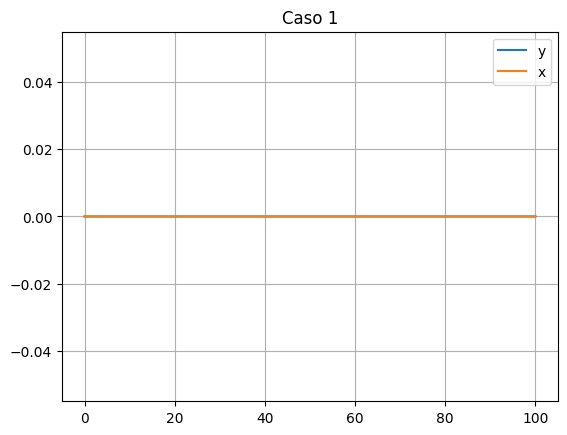

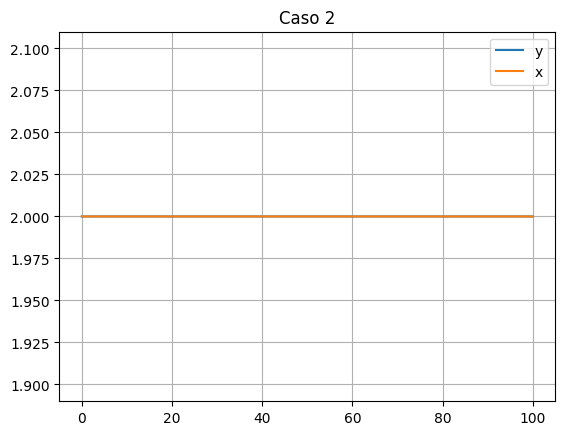

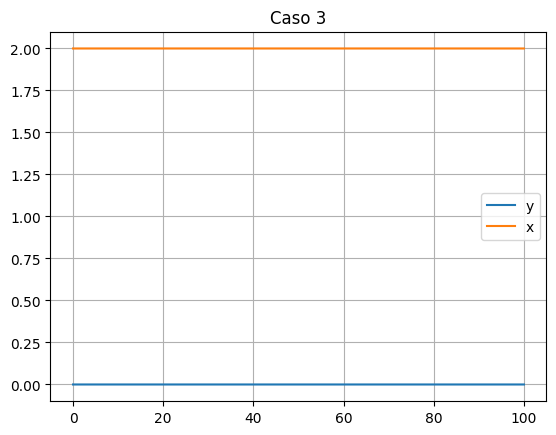

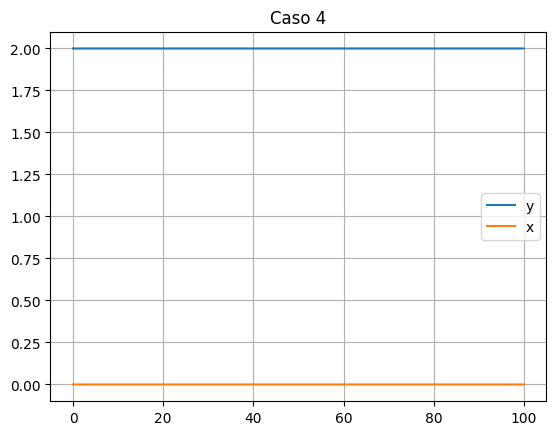

In [35]:
Xea = Euler(derivative, X0a, t)
Xeb = Euler(derivative, X0b, t)
Xec = Euler(derivative, X0c, t)
Xed = Euler(derivative, X0d, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xea[:, 0], label = 'y')
plt.plot(t, Xea[:, 1], label = "x")
plt.title('Caso 1')
plt.legend(loc = "best")
plt.grid()
plt.show()

plt.plot(t, Xeb[:, 0], label = 'y')
plt.plot(t, Xeb[:, 1], label = "x")
plt.title('Caso 2')
plt.legend(loc = "best")
plt.grid()
plt.show()

plt.plot(t, Xec[:, 0], label = 'y')
plt.plot(t, Xec[:, 1], label = "x")
plt.title('Caso 3')
plt.legend(loc = "best")
plt.grid()
plt.show()

plt.plot(t, Xed[:, 0], label = 'y')
plt.plot(t, Xed[:, 1], label = "x")
plt.title('Caso 4')
plt.legend(loc = "best")
plt.grid()
plt.show()




c) Para la estabilidad, primero se calcula el Jacobiano:

$$
\frac{du_1}{d\tau}=u_1(1-u_1-b_{1,2}u_2)=f(u_1,u_2)
$$

$$
\frac{du_2}{d\tau}=\mu u_2(1-u_2-b_{2,1}u_1)=g(u_1,u_2)
$$

$$
J=\begin{bmatrix}
1-2u_1-b_{1,2}u_2 & -u_1b_{1,2}\\
-\mu u_2b_{2,1} & \mu-2u_2\mu-\mu b_{2,1}u_1
\end{bmatrix}
$$

$$
J(0,0)=\begin{bmatrix}
1 & 0\\
0 & \mu
\end{bmatrix}
$$

Calculando valores propios:

$$
\lambda=(1,\mu)
$$

$$
J\left(\frac{1-b_{1,2}}{1-b_{1,2}b_{2,1}},\frac{1-b_{2,1}}{1-b_{1,2}b_{2,1}}\right)=\begin{bmatrix}
1-2u_1^*-b_{1,2}u_2^* & -u_1^*b_{1,2}\\
-\mu u_2^*b_{2,1} & \mu-2u_2^*\mu-\mu b_{2,1}u_1^*
\end{bmatrix}
$$

Analizando, se puede notar que para valores menores que 1 en ambas variables, se tendrá una matriz con valores propios con parte real negativa, luego será estable.

Explicándolo biológicamente, si no hay mucha competencia ambas especies pueden coexistir con la condición de que su población sea menor que su respectiva capacidad de carga (carrying capacity).

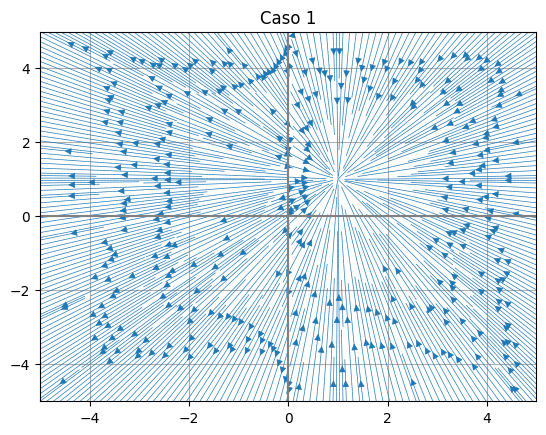

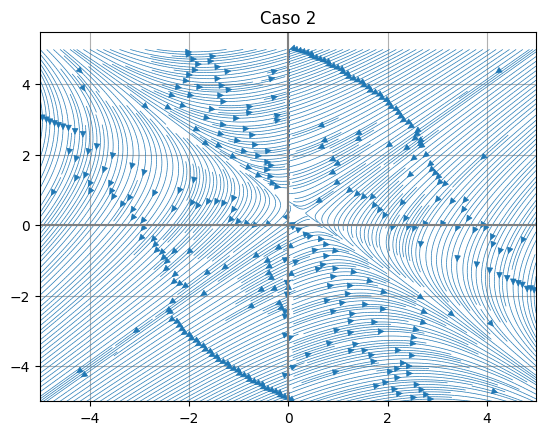

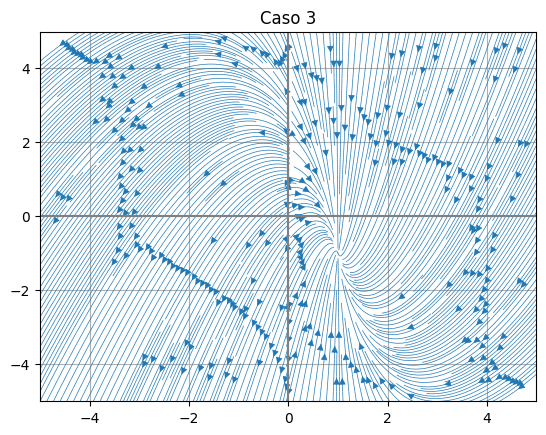

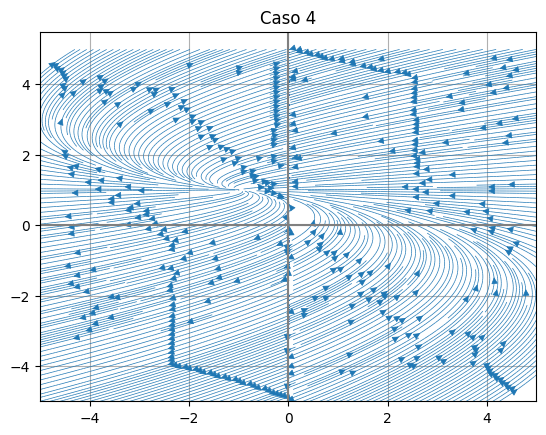

In [36]:
#Phase portrait

x, y = meshgrid(arange(-5, 5, 0.01), arange(-5, 5, 0.01))
u1=x
u2=y

#Caso 1
b1=0
b2=0
xdot = u1*(1-u1-b1*u2)
ydot = (u1/u2)*u2*(1-u2-b2*u1)
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title('Caso 1')
grid(); show()

#Caso 2
b1=2
b2=2
xdot = u1*(1-u1-b1*u2)
ydot = (u1/u2)*u2*(1-u2-b2*u1)
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title('Caso 2')
grid(); show()
#Caso 3
b1=0
b2=2
xdot = u1*(1-u1-b1*u2)
ydot = (u1/u2)*u2*(1-u2-b2*u1)
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title('Caso 3')
grid(); show()
#Caso 4
b1=2
b2=0
xdot = u1*(1-u1-b1*u2)
ydot = (u1/u2)*u2*(1-u2-b2*u1)
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title('Caso 4')
grid(); show()

#6.5 Conservative Systems

##6.5.2 Consider the system $\ddot{x}=x-x^2$
##a) Find and classify the equilibrium points.
##b) Sketch the phase portrait.
##c) Find an equation for the homoclinic orbit that separates closed and nonclosed trajectories.

a) Asumiendo $\dot{x}=y$:

$$
\dot{y}=\ddot{x}=x-x^2
$$

Los puntos de equilibrio son: $(0,0)\;\;\;y\;\;\;(1,0)$

Para la estabilidad se calcula el Jacobiano:

$$
J=\begin{bmatrix}
0 & 1\\
1-2x & 0
\end{bmatrix}
$$

$$
J(0,0)=\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

Los valores propios son:

$$
\lambda = \pm 1
$$

Luego como se tiene un negativo y un positivo, es un saddle-node inestable.

$$
J(1,0)=\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
$$

Los valores propios son:

$$
\lambda = \pm i
$$

Luego como se tienen valores puramente imaginarios, hay un centro.


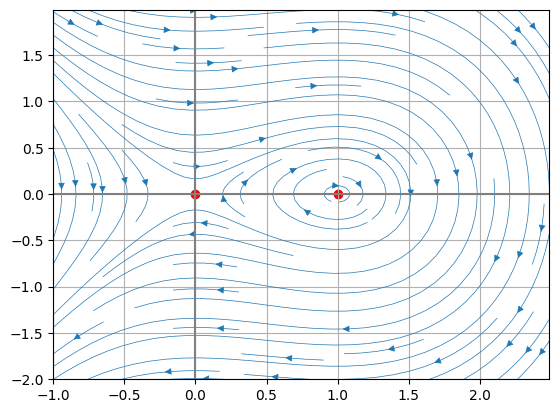

In [37]:
#b
#Phase portrait

x, y = meshgrid(arange(-1, 2.5, 0.01), arange(-2, 2, 0.01))
xdot = y
ydot = x-x**2
streamplot(x, y, xdot, ydot, density=1, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

plt.scatter(0, 0,color='red', marker='o')
plt.scatter(1, 0,color='red', marker='o')

grid(); show()

c) Analizando la curva, pasa por $(0,0)$ y $(1.5,0)$, luego:

$$
\frac{dx}{dt}=y
$$

$$
\frac{dy}{dt}=x-x^2
$$

$$
\frac{dy}{dx}=\frac{x-x^2}{y}
$$

$$
ydy=(x-x^2)dx
$$

$$
\frac{y^2}{2}=\frac{x^2}{2}-\frac{x^3}{3}+C
$$

Luego, como pasa por $0,0$:

$$
\frac{y^2}{2}=\frac{x^2}{2}-\frac{x^3}{3}
$$

In [38]:
X0=[1, 0] #X y Y inicial 
def derivative(X, t):
    x, y = X
    dotx = y
    doty = x-x**2
    return np.array([dotx, doty])

In [39]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

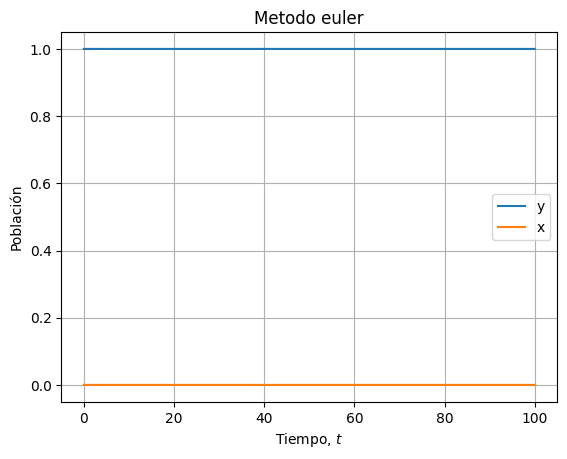

In [40]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

##6.5.4 Sketch the phase portrait for the system $\ddot{x}=ax-x^2$ for $a<0,\;a=0$ and $a>$.

Teniendo en cuenta que $\dot{x}=y$:

$$
\dot{y}=\ddot{x}=ax-x^2
$$

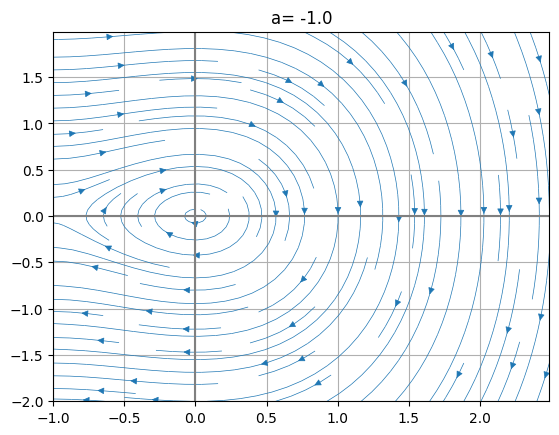

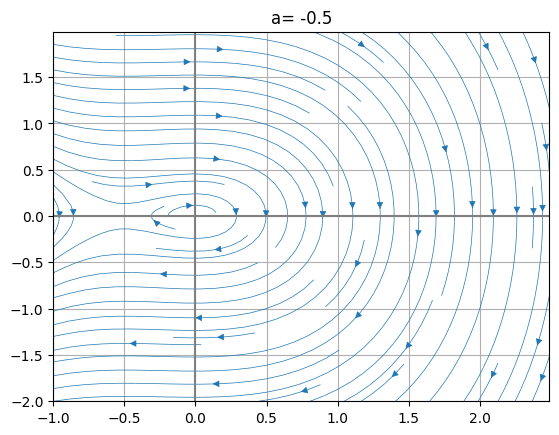

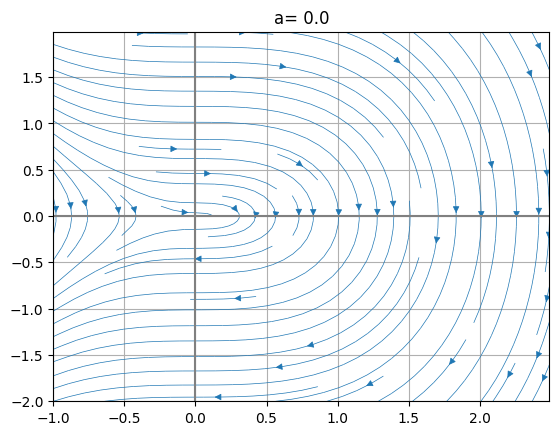

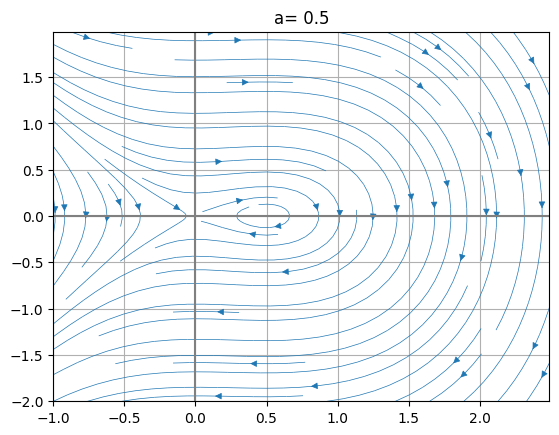

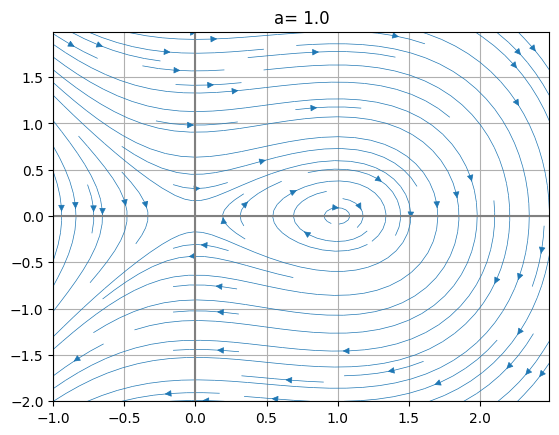

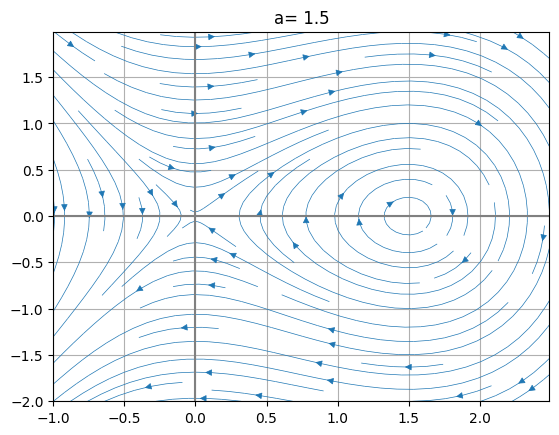

In [41]:
#Graficando:

#Phase portrait

x, y = meshgrid(arange(-1, 2.5, 0.01), arange(-2, 2, 0.01))
for a in np.arange(-1,1.6,0.5):
  xdot = y
  ydot = a*x-x**2
  streamplot(x, y, xdot, ydot, density=1, linewidth=0.5)
  plt.axhline(y=0, color='grey', linestyle='-')
  plt.axvline(x=0, color='grey', linestyle='-')
  plt.title('a= '+str(a))
  grid(); show()






##6.5.14 (Glider) Consider a glider flying at speed $v$ at an angle $\theta$ to the horizontal. Its motion is governed approximately by the dimensionless equations

$$
\dot{v}=-\sin{\theta}-Dv^2
$$

$$
v\dot{\theta}=-\cos{\theta}+v^2
$$

where the trigonometric terms represent the effects of gravity and the $v^2$ terms represent the effects of drag and lift.

a) Suppose there is no drag $(D=0)$. Show that $v^3-3v\cos{\theta}$ is a conserved quantity. Sketch the phase portrait in this case. Interpret your results physically. What does the flight path of the glider look like?

b) Investigate the case of positive drag $(D>0)$.

a) Tenemos en cuenta:

$$
(1)\;\;\; E(v,\theta)=v^3-3v\cos{\theta}
$$

Entonces:

$$
(2)\;\;\;\frac{dE}{dt}=3v^2\dot{v}-3(\dot{v}\cos{\theta}-\sin{\theta}v\dot{\theta})
$$

Dado que

$$
\dot{v}=-\sin{\theta}-Dv^2
$$

$$
v\dot{\theta}=-\cos{\theta}+v^2
$$

Con $D=0$ y usando la ecuación $(2)$:

$$
\frac{dE}{dt}=3v^2(-\sin{\theta})-3(\cos{\theta}(-\sin{\theta})-\sin{\theta}(-\cos{\theta}+v^2))
$$

$$
\frac{dE}{dt}=0
$$

Luego $E$ se conserva.

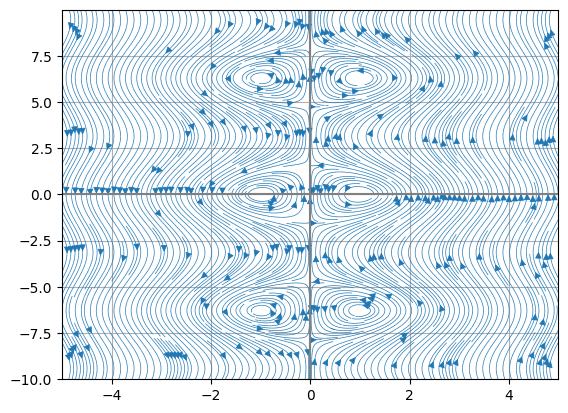

In [42]:
#Phase portrait drag = 0

x, y = meshgrid(arange(-5, 5, 0.01), arange(-10, 10, 0.01))
xdot = -sin(y)
ydot = (-cos(y)+x**2)/x
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')


grid(); show()
#Luego la gráfica se repite periódicamente

Analizándolo físicamente, como no hay drag el planeador está dando vueltas y como existe un lift, la única forma de moverse en el eje Z en el espacio con un planeador es cayendo, por lo tanto este esta cayendo dando vueltas cerradas.

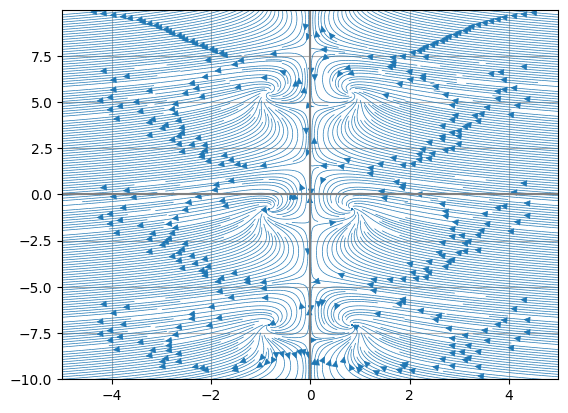

In [43]:
#Phase portrait positive drag

x, y = meshgrid(arange(-5, 5, 0.01), arange(-10, 10, 0.01))
xdot = -sin(y)-x**2
ydot = (-cos(y)+x**2)/x
streamplot(x, y, xdot, ydot, density=5, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')


grid(); show()
#Luego la gráfica se repite periódicamente

Un drag positivo indica que el planeador se está moviendo en el espacio mientras se está elevando o está cayendo, como se observa en la imagen:

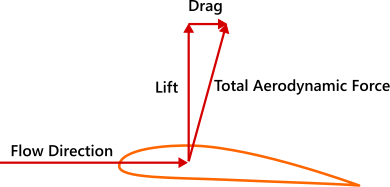

#6.7 Pendulum

##6.7.2 (Pendulum driven by constant torque) The equation $\ddot{\theta}+\sin{\theta} =\gamma$ describes the dynamics of an undamped pendulum driven by a constant torque, or an undamped Josephson junction driven by a constant bias current.
##a) Find all the equilibrium points and classify them as $\gamma$ varies.
##b) Sketch the nullclines and the vector field.
##c) Is the system conservative? If so, find a conserved quantity. Is the system reversible?
##d) Sketch the phase portrait on the plane as $\gamma$ varies.
##e) Find the approximate frequency of small oscillations about any centers in the phase portrait.

a) Reescribiendo el sistema:
$$
\dot{\theta}=v
$$
$$
\dot{v}=-\sin{(\theta)}+\gamma
$$
Los puntos de equilibrio son $(\theta\;\;\; v)^{T}=(\arcsin{(\gamma)}\;\;\;0)^T$. $\arcsin{(\gamma)}$ tiene infinitos puntos para un $\gamma$ (periodicidad en dirección vertical). Para clasificarlos, se calcula el Jacobiano, se insertan los valores y se evalúa el determinante:

$$
J=\begin{bmatrix}
0 & 1\\
-\cos{(\theta)} & 0
\end{bmatrix},\;\;
J^*=\begin{bmatrix}
0 & 1\\
-\cos{(\arcsin{(\gamma)})} & 0
\end{bmatrix},\;\;
\det{J^*}=\cos{(\arcsin{(\gamma)})}
$$

Ya que $tr(J^*)=0$, tenemos centros para $\det{(J^*)}>0$, saddle-nodes para $\det{(J^*)}<0$ y puntos fijos no aislados en los otros casos.

$\arcsin{(\gamma)}$ solo está definida por $-1\leq\gamma\leq1$, pero hay valores infinitos para cada coordenada definida (debido a su periodicidad vertical). Siendo más precisos, si $\beta$ es una solución de $\arcsin{(\gamma)}$, entonces $2n\pi +\beta\;\;$ y $\;\;(2n-1)\pi-\beta$ también lo son. 

En la función coseno $\cos{(\arcsin{(\gamma)})}$, el segundo set de soluciones periódicas producirá resultados con un signo opuesto debido a el cambio de periodicidad de ambas funciones. Como resultado, $J=\cos{(\arcsin{(\gamma)})}$ produce valores infinitos negativos (saddles) y positivos (centros) para un $\beta$.

En resumen, $-1<\gamma < 1$ produce infinitos nodos de centro y saddle, al escoger $\gamma=1$ o $\gamma=-1$, $\det{(J^*)}=0$ resulta en puntos no aislados. Otros valores de $\gamma$ no están permitidos. 



c) Multiplicando por $\dot{\theta}$ sugiere una derivada en el tiempo. Acomodando a $d/dt$ resulta:
$$
\dot{\theta}\ddot{\theta}+\dot{\theta}\sin{(\theta)}-\gamma \dot{\theta}=0\Leftrightarrow \frac{d}{dt}\left(\frac{1}{2}mv^2-mR^2\cos{(\theta)}-mR^2\gamma \theta \right)=0 
$$

Donde $v=\dot{\theta}R$. En esta ecuación, $\frac{1}{2}mv^2+V(\theta)$ representa una constante (energía), y por lo tanto una cantidad conservativa. Ya que $\ddot{\theta}+\sin{\theta}=\gamma$ es invariante a $t\rightarrow -t$ (la segunda derivada tendrá el mismo signo), el sistema es **reversible**.

In [44]:
#Punto b nullclines

X0=[1, 1] #X y Y inicial
def derivative(X, t):
    x, y = X
    dotx = y
    doty = -sin(x)+0.5 #Gamma = 0.5
    return np.array([dotx, doty])

In [45]:
Nt = 100000 #Numero de muestras
tmax = 100 # Tiempo final
t = np.linspace(0.,tmax, Nt)

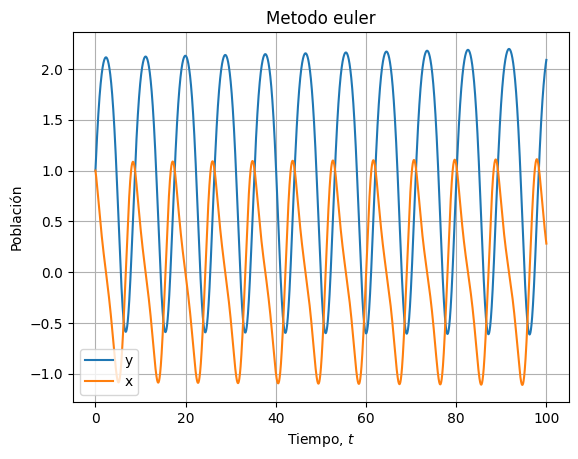

In [46]:
Xe = Euler(derivative, X0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'y')
plt.plot(t, Xe[:, 1], label = "x")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Población')
plt.legend(loc = "best")

plt.show()

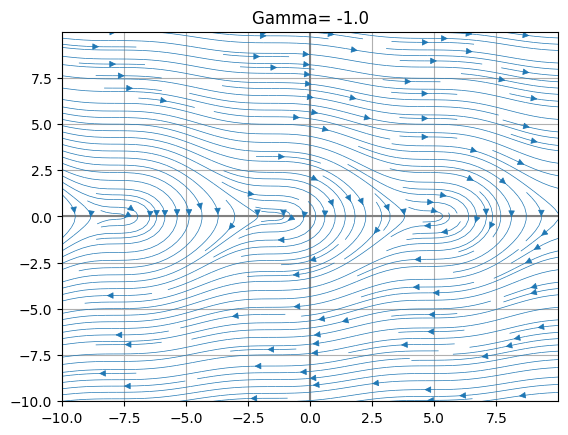

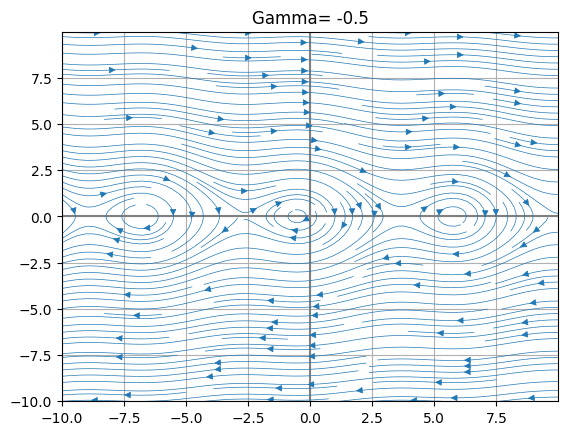

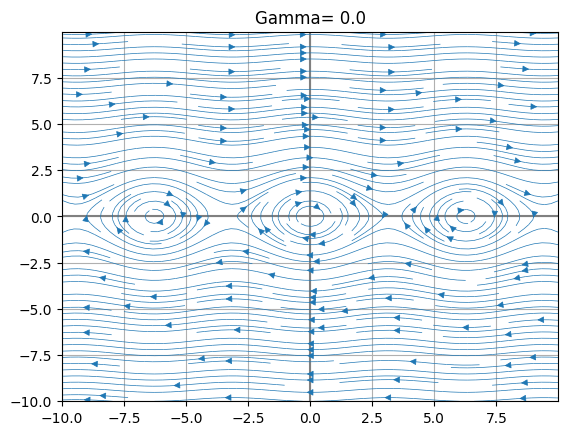

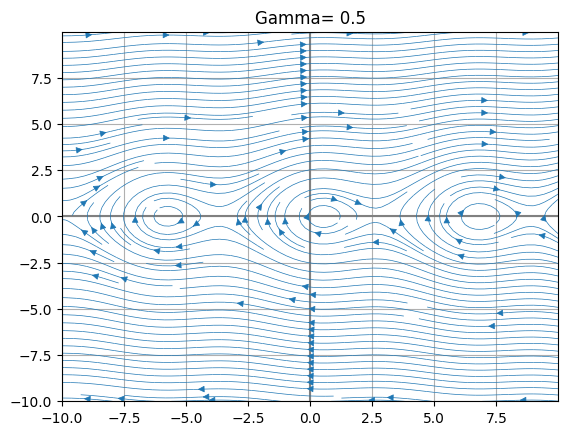

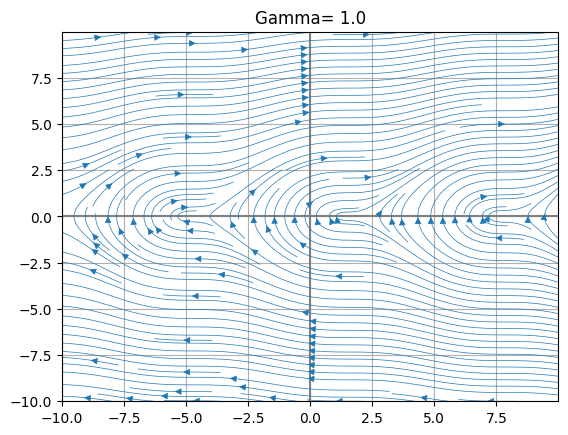

In [47]:
#b y d fase
#Phase portrait
x, y = meshgrid(arange(-10, 10, 0.01), arange(-10, 10, 0.01))
for gamma in np.arange(-1,1.1,0.5):
  xdot = y
  ydot = -sin(x)+gamma
  plt.axhline(y=0, color='grey', linestyle='-')
  plt.axvline(x=0, color='grey', linestyle='-')
  plt.title('Gamma= '+str(gamma))
  streamplot(x, y, xdot, ydot, density=2, linewidth=0.5)
  grid(); show()



e) Como se conoce de la observación del Jacobiano, el origen está en un centro. Determinando sus valores propios desde la ecuación, se obtiene $\lambda_{1,2}=\pm i\sqrt{\cos{(\arcsin{(\gamma)})}}$. Como la frecuencia no debe ser mayor que un intervalo de la función arcoseno, se puede usar la identidad trigonométrica y reescribir $\omega = \sqrt[4]{1-\gamma^2}$.

##6.7.4 (Period of the pendulum) Suppose a pendulum governed by $\ddot{\theta}+\sin{\theta}=0$ is swinging with an amplitude $\alpha$. Using some tricky manipulations, we are going to derive a formula for $T(\alpha)$, the period of the pendulum.
##a) Using conservation of energy, show that $\dot{\theta}^2=2(\cos{\theta}-\cos{\alpha})$ and hence that
##$$
T=4\int_0^{\alpha}\frac{d\theta}{\left[2(\cos{\theta}-\cos{\alpha})\right]^{1/2}}.
$$
##b) Using the half-angle formula, show that $T=4\int_0^{\alpha}\frac{d\theta}{\left[4(\sin^2{\frac{1}{2}\alpha}-\sin^2{\frac{1}{2}\theta})\right]^{1/2}}.$
##c) The formulas in parts (a) and (b) have the disadvantage that $\alpha$ appears in both the integrand and the upper limit of integration. To remove the $\alpha$-dependence from the limits of integration, we introduce a new angle $\phi$ that runs from $0$ to $\frac{\pi}{2}$ when $\phi$ runs from $0$ to $\alpha$. Specifically, let $\left(\sin{\frac{1}{2}\alpha}\right)\sin{\phi}=\sin{\frac{1}{2}\phi}$. Using this substitution, rewrite (b) as an integral with respect to $\phi$. Thereby derive the exact result
##$$
T=4\int_0^{\pi/2}\frac{d\phi}{\cos{\frac{1}{2}\theta}} =4K\left(\sin^2{\frac{1}{2}\alpha}\right),
$$
##where the *complete elliptic integral of the first kind* is defined as
##$$
K(m)=\int_0^{\pi/2}\frac{d\phi}{(1-m\sin^2{\phi})^{1/2}},\textrm{ for }0\leq m\leq 1.
$$


a) Para empezar, notar que:
$$
\frac{d}{dt}\left[\frac{1}{2}\left(\frac{d\theta}{dt}\right)^2\right]=\frac{d^2\theta}{dt^2}\cdot \frac{d\theta}{dt}
$$

y:

$$
\int\frac{d^2\theta}{dt^2}\cdot \frac{d\theta}{dt}=\frac{1}{2}\left(\frac{d\theta}{dt}\right)^2+C
$$

Multiplicando la ecuación diferencial dada por $\frac{d\theta}{dt}$ resulta:

$$
\frac{d^2\theta}{dt^2}\cdot \frac{d\theta}{dt}=-\sin{\theta}\frac{d\theta}{dt}
$$

Luego:

$$
\int\frac{d^2\theta}{dt^2}\cdot \frac{d\theta}{dt}dt=\int -\sin{\theta}\frac{d\theta}{dt}dt
$$

o

$$
\frac{1}{2}\left(\frac{d\theta}{dt}\right)^2=\cos{\theta}+C
$$

Pero, $\frac{d\theta}{dt}=0$ cuando $\theta=\alpha$, por lo tanto se podría decir que $C=-\cos{\alpha}$, luego:

$$
\frac{1}{2}\left(\frac{d\theta}{dt}\right)^2=\cos{\theta}-\cos{\alpha}
$$

o

$$
\mathbf{\dot{\theta}^2=2\left(\cos{\theta}-\cos{\alpha}\right)}
$$

Comprobando la ecuación. Luego:

b) Sabemos que $\cos{\theta}=1-2\sin^2{\frac{\theta}{2}}$, y que $\cos{\alpha}=1-2\sin^2{\frac{\alpha}{2}}$, sustituyendo:

$$
\frac{d\theta}{dt}=\dot{\theta}=2\sqrt{\sin^2{\frac{\alpha}{2}}-\sin^2{\frac{\theta}{2}}}
$$

Considerando $k=\frac{\sin{\alpha}}{2}$

$$
\frac{d\theta}{dt}=2\sqrt{k^2-\sin^2{\frac{\theta}{2}}}
$$

o

$$
\frac{dt}{d\theta}=\frac{1}{2\sqrt{k^2-\sin^2{\frac{\theta}{2}}}}
$$

Integrando de de $0$ a $T/4$ en el lado izquierdo de la ecuación y de $0$ a $\alpha$ en el lado derecho:

$$
\int_0^{T/4}\frac{dt}{d\theta}\cdot d\theta=\int_0^{\alpha}\frac{d\theta}{2\sqrt{k^2-\sin^2{\frac{\theta}{2}}}}
$$

Finalmente:

$$
T=4\int_0^{\alpha}\frac{d\theta}{\left[4(\sin^2{\frac{1}{2}\alpha}-\sin^2{\frac{1}{2}\theta})\right]^{1/2}}
$$

c) Teniendo en cuenta que:

$$
\sin{\left(\frac{1}{2}\alpha\right)}\sin{\phi}=\sin{\left(\frac{1}{2}\theta\right)}
$$

Entonces:

$$
\sin{\left(\frac{1}{2}\alpha\right)}\cdot \cos{\phi}d\phi =\frac{1}{2}\cos{\left(\frac{1}{2}\theta\right)}d\theta
$$

Del punto b):

$$
T=4\int_0^{\alpha}\frac{d\theta}{\left[4(\sin^2{\frac{1}{2}\alpha}-\sin^2{\frac{1}{2}\theta})\right]^{1/2}}=4\int_0^{\pi/2}\frac{d\phi}{\cos{\frac{1}{2}\theta}}
$$

Entonces:

$$
T=4\int_0^{\pi/2}\frac{d\phi}{\cos{\frac{\theta}{2}}}
$$

Luego, definiendo:

$$
K(m)=\int_0^{\pi/2}\frac{d\phi}{\sqrt{1-m\sin^2{\phi}}}
$$

Teniendo en cuenta que:

$$
K\left(\sin^2{\frac{1}{2}\alpha}\right)=\int_0^{\pi/2}\frac{d\phi}{\left[(1-\sin^2{\frac{1}{2}\alpha}\sin^2{\frac{1}{2}\phi})\right]^{1/2}}
$$

Por identidad trigonométrica:

$$
=\int_0^{\pi/2}\frac{d\phi}{\sqrt{1-\sin^2{\left(\frac{1}{2}\theta\right)}}}
$$

$$
=\int_0^{\pi/2}\frac{d\phi}{\cos{\frac{\theta}{2}}}
$$

Sustituyendo:

$$
T=4K\left(\sin^2\frac{1}{2}\alpha\right)
$$

<ipython-input-48-ae61b7555f01>:4: RuntimeWarning: invalid value encountered in sqrt
  xdot = 2*np.sqrt(np.sin(y/2)**2-np.sin(x/2)**2) #Theta punto, alpha = y


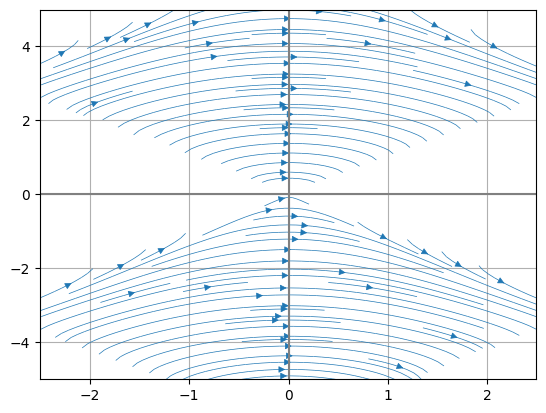

In [48]:
#Phase portrait

x, y = meshgrid(arange(-2.5, 2.5, 0.01), arange(-5, 5, 0.01))
xdot = 2*np.sqrt(np.sin(y/2)**2-np.sin(x/2)**2) #Theta punto, alpha = y
ydot = -sin(x)
streamplot(x, y, xdot, ydot, density=2, linewidth=0.5)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')

#plt.scatter(1, 0,color='red', marker='o')

grid(); show()

##Nota: No hay más ejercicios pares de esta sección 🙏